# EVAL Pt. 1

## a) 




1000


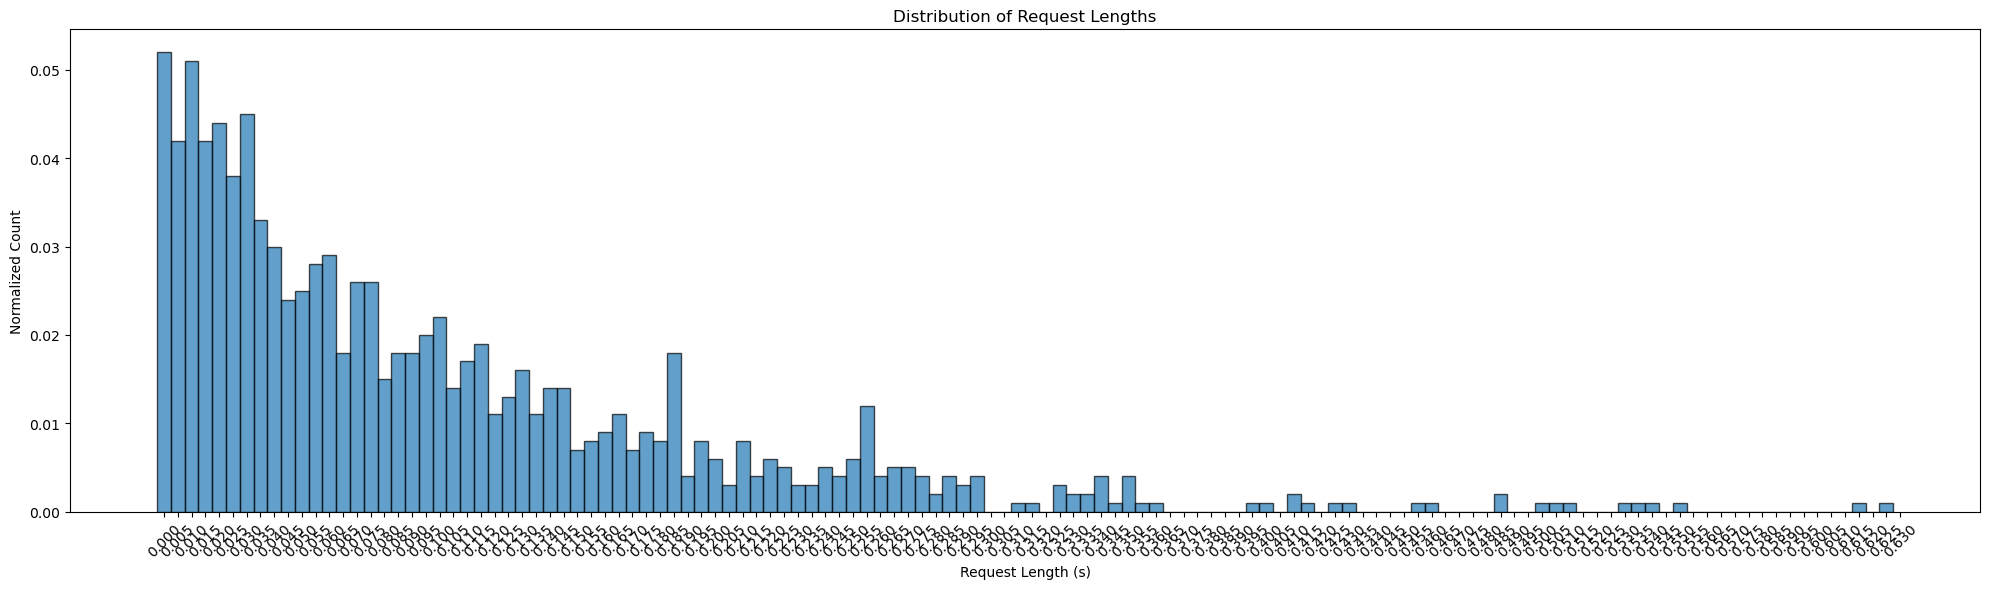

In [39]:
import matplotlib.pyplot as plt
import numpy as np

filename = "/Users/jialuli/Desktop/BU Fall 2023/CS 350/hw2/src/server_mt_out.txt"  # Replace with the actual path to your file

req_len = []
with open(filename, 'r') as file:
    for line in file:
        if not line.strip().startswith('[#WORKER#]'):  # Check if the line starts with [#WORKER#]
            columns = line.split(',')  
            if len(columns) > 1: 
                second_col = columns[1]
                req_len.append(float(second_col))
                

print(len(req_len))
# Define the bins
bin_width = 0.005
max_bin_value = max(req_len)
bins = np.arange(0, max_bin_value + bin_width, bin_width)

# Calculate the histogram
counts, bin_edges = np.histogram(req_len, bins=bins)

# Normalize the counts by the total number of requests
normalized_counts = counts / 1000  # As the task requires normalization by 1000

# Plotting the histogram
plt.figure(figsize=(20, 6))
plt.bar(bin_edges[:-1], normalized_counts, width=bin_width, edgecolor='k', alpha=0.7)
plt.title('Distribution of Request Lengths')
plt.xlabel('Request Length (s)')
plt.ylabel('Normalized Count')
plt.xticks(bins, rotation=45)
plt.tight_layout()
plt.show()

## b)

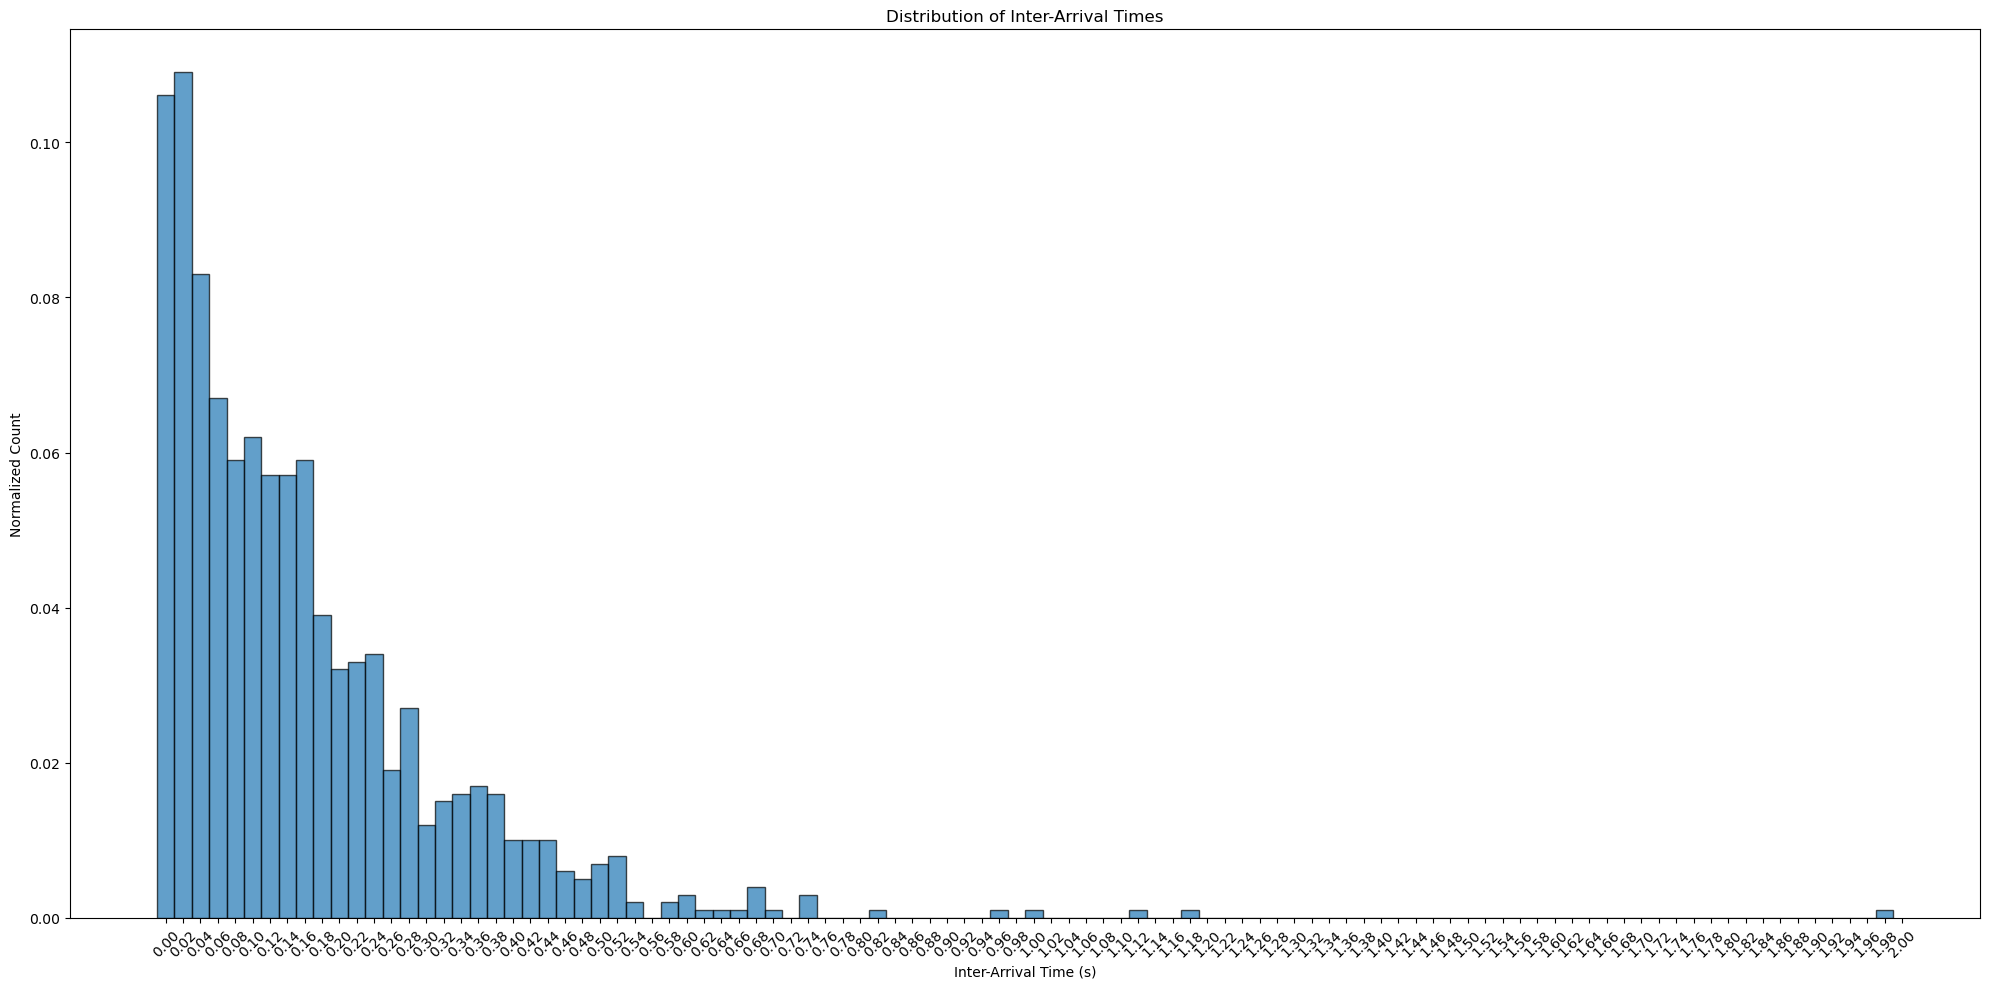

In [50]:
timestamps = []

with open(filename, 'r') as file:
    for line in file:
        if not line.strip().startswith('[#WORKER#]'):
            columns = line.split(',')
            if len(columns) > 1:
                sent_timestamp = float(columns[0].split(':')[1])
                timestamps.append(sent_timestamp)

inter_arrival_times = [timestamps[i] - timestamps[i - 1] for i in range(1, len(timestamps))]

# Define the bins
bin_width = 0.02
max_bin_value = max(inter_arrival_times)
bins = np.arange(0, max_bin_value + bin_width, bin_width)

# Calculate the histogram
counts, bin_edges = np.histogram(inter_arrival_times, bins=bins)

# Normalize the counts by the total number of inter-arrival times
normalized_counts = counts / 999  # As the task requires normalization by 999

# Plotting the histogram
plt.figure(figsize=(20, 10))
plt.bar(bin_edges[:-1], normalized_counts, width=bin_width, edgecolor='k', alpha=0.7)
plt.title('Distribution of Inter-Arrival Times')
plt.xlabel('Inter-Arrival Time (s)')
plt.ylabel('Normalized Count')
plt.xticks(bins, rotation=45)
plt.tight_layout()
plt.show()

## c)

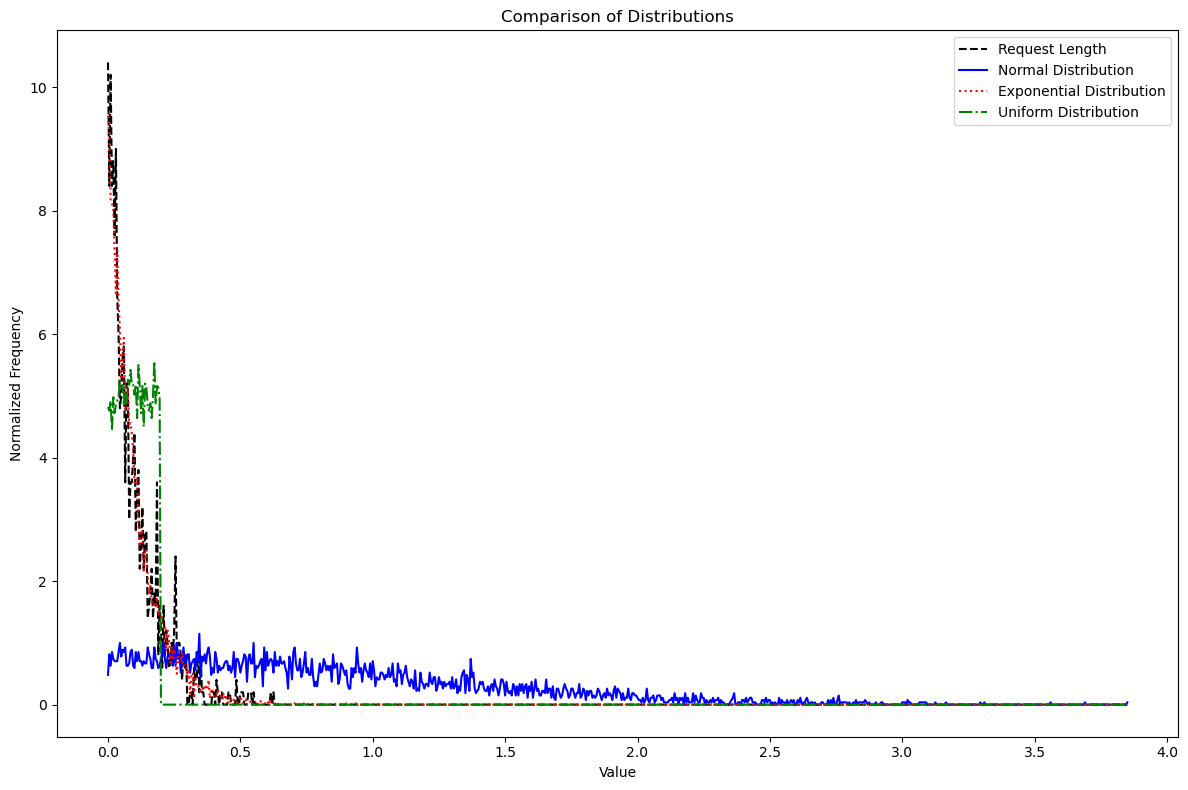

In [46]:
import matplotlib.pyplot as plt

# Define the number of samples
num_samples = 10000

# Define the mean
mean = 1/10

# 1. Generate samples from the Normal distribution
normal_samples = np.random.normal(loc=mean, scale=1, size=num_samples)

# 2. Generate samples from the Exponential distribution
exponential_samples = np.random.exponential(scale=mean, size=num_samples)

# 3. Generate samples from the Uniform distribution
uniform_samples = np.random.uniform(low=0, high=2 * mean, size=num_samples)

# Define the bins
bin_width = 0.005
max_bin_value = max(max(req_len), max(normal_samples), max(exponential_samples), max(uniform_samples))
bins = np.arange(0, max_bin_value + bin_width, bin_width)

# Compute normalized histograms for all distributions
hist_exp, _ = np.histogram(req_len, bins=bins, density=True)
hist_normal, _ = np.histogram(normal_samples, bins=bins, density=True)
hist_exponential, _ = np.histogram(exponential_samples, bins=bins, density=True)
hist_uniform, _ = np.histogram(uniform_samples, bins=bins, density=True)

# Plotting the histograms
plt.figure(figsize=(12, 8))
plt.plot(bins[:-1], hist_exp, label='Request Length', linestyle='dashed', color='black')
plt.plot(bins[:-1], hist_normal, label='Normal Distribution', linestyle='solid', color='blue')
plt.plot(bins[:-1], hist_exponential, label='Exponential Distribution', linestyle='dotted', color='red')
plt.plot(bins[:-1], hist_uniform, label='Uniform Distribution', linestyle='dashdot', color='green')

plt.title('Comparison of Distributions')
plt.xlabel('Value')
plt.ylabel('Normalized Frequency')
plt.legend()
plt.tight_layout()
plt.show()

**The exponential distribution matches the characteristics of the distribution of request lengths**

## d)

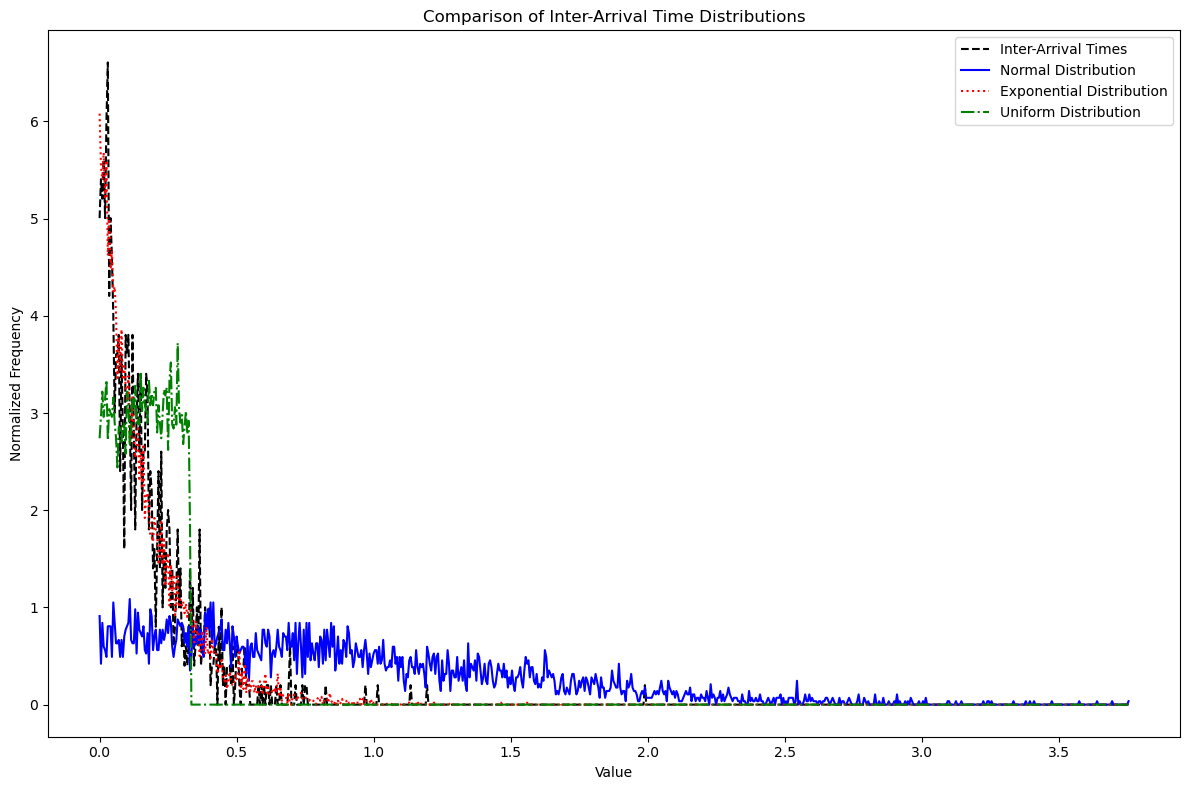

In [47]:
mean = 1/6

normal_samples = np.random.normal(loc=mean, scale=1, size=num_samples)
exponential_samples = np.random.exponential(scale=mean, size=num_samples)
uniform_samples = np.random.uniform(low=0, high=2 * mean, size=num_samples)

bin_width = 0.005
max_bin_value = max(max(inter_arrival_times), max(normal_samples), max(exponential_samples), max(uniform_samples))
bins = np.arange(0, max_bin_value + bin_width, bin_width)

hist_inter_arrival, _ = np.histogram(inter_arrival_times, bins=bins, density=True)
hist_normal, _ = np.histogram(normal_samples, bins=bins, density=True)
hist_exponential, _ = np.histogram(exponential_samples, bins=bins, density=True)
hist_uniform, _ = np.histogram(uniform_samples, bins=bins, density=True)

plt.figure(figsize=(12, 8))
plt.plot(bins[:-1], hist_inter_arrival, label='Inter-Arrival Times', linestyle='dashed', color='black')
plt.plot(bins[:-1], hist_normal, label='Normal Distribution', linestyle='solid', color='blue')
plt.plot(bins[:-1], hist_exponential, label='Exponential Distribution', linestyle='dotted', color='red')
plt.plot(bins[:-1], hist_uniform, label='Uniform Distribution', linestyle='dashdot', color='green')

plt.title('Comparison of Inter-Arrival Time Distributions')
plt.xlabel('Value')
plt.ylabel('Normalized Frequency')
plt.legend()
plt.tight_layout()
plt.show()

**The characteristics of inter-arrival times also match with exponential distribution**

**-a controls the inter-arrival time inversely and -s controls request lengths inversely**

# EVAL Pt.2

## a)

In [76]:
filename = "/Users/jialuli/Desktop/BU Fall 2023/CS 350/hw2/src/server_q_out.txt"  # replace with the path to your file


def get_average(filename):
    total_time = 0.0
    weighted_sum = 0.0
    
    with open(filename, 'r') as file:
        lines = file.readlines()
        prev_request_length = 0.0
        for line in lines:
            line = line.strip()
            if line.startswith('Q:'):  # This is a line with queue info
                queue_size = line.count('R')  # count the number of requests in the queue
                weighted_sum += queue_size * prev_request_length  # calculate weighted sum
            elif line.startswith('R'):  # This is a line with request info
                parts = line.split(',')
                # extracting the request length (it's the second value in the 'R' line)
                prev_request_length = float(parts[1])
                total_time += prev_request_length  # sum up the total time
    # calculate the weighted average
    if total_time != 0:
        weighted_average = weighted_sum / total_time
    else:
        weighted_average = 0
    
    return total_time, weighted_average

total_t, weighted_avg = get_average(filename)

print(f"The weighted average of the queue length is {weighted_avg}")

The weighted average of the queue length is 9.801326249113826


## b)

In [83]:
import os

utilizations = []
response_times = []
queue_lengths = []

def get_average_response(filename):
    total_response_time = 0.0
    weighted_sum = 0.0
    total_time = 0.0
    
    with open(filename, 'r') as file:
        lines = file.readlines()
        count = 0
        for line in lines:
            line = line.strip()
            if line.startswith('Q:'):  # This is a line with queue info
                queue_size = line.count('R')  # count the number of requests in the queue
                weighted_sum += queue_size * prev_request_length  # calculate weighted sum
            elif line.startswith('R'):  # This is a line with request info
                parts = line.split(',')
                prev_request_length = float(parts[1])
                total_time += prev_request_length  # sum up the total time
                # extracting the request length (it's the second value in the 'R' line)
                start_timestamp = float(parts[3])
                completion_timestamp = float(parts[4])
                
                # Calculate and accumulate the response time
                response_time = completion_timestamp - start_timestamp
                total_response_time += response_time
                count += 1
    # calculate the weighted average
    if total_time != 0:
        weighted_average = weighted_sum / total_time
    else:
        weighted_average = 0
    if count == 0:
        avg_response_time = 0
    else:
        avg_response_time = total_response_time / count
    
    return avg_response_time, weighted_average

for i in range(1, 16):  # for each experiment
    filename = f"/Users/jialuli/Desktop/BU Fall 2023/CS 350/hw2/src/server_out/{i}.txt"
    if os.path.exists(filename):
        with open(filename, 'r') as file:
            avg_response_time, avg_queue_length = get_average_response(filename)
            response_times.append(avg_response_time)
            queue_lengths.append(avg_queue_length)

print(response_times)
print(queue_lengths)

# Define the file path
file_path = '/Users/jialuli/Desktop/BU Fall 2023/CS 350/hw2/src/server_q_15_time.txt'

# Open the file in read mode
with open(file_path, 'r') as file:
    # List to store the extracted percentages
    utilization = []
    # Read the file line by line
    for line in file:
        # If line contains "Percent of CPU this job got"
        if 'Percent of CPU this job got' in line:
            # Extract the percentage value
            percentage = float(line.split(':')[1].strip().rstrip("%"))/100
            # Append it to the list
            utilization.append(percentage)
            
# Print the extracted percentages
print(utilization)
print(len(response_times))
print(len(queue_lengths))

[0.06654513900028541, 0.06660295499971836, 0.06652286700025434, 0.06650720000031288, 0.0665036170000094, 0.0665117229996249, 0.06656156700020074, 0.06651509400000213, 0.06653719899983844, 0.06653218799972092, 0.06650345499950344, 0.06650385999999707, 0.06655327099989518, 0.06651165199949173, 0.06650320299953455]
[0.11419732637759121, 0.2852468796946906, 0.4535470865486631, 0.601253216708445, 0.8330917215013693, 1.0820218361599, 1.3391111206814186, 1.6711502420393876, 2.081194462372899, 2.67205770366016, 3.762425967248559, 5.27681646981189, 7.2249250270510705, 9.740283260111962, 14.550610488534879]
[0.06, 0.13, 0.2, 0.26, 0.33, 0.4, 0.46, 0.53, 0.6, 0.66, 0.73, 0.8, 0.86, 0.91, 0.97]
15
15


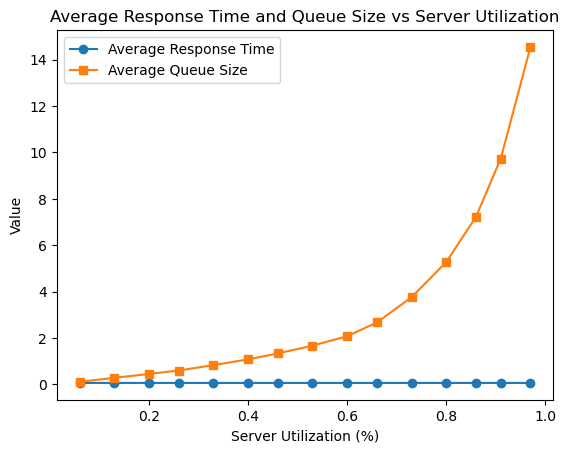

In [84]:
plt.plot(utilization, response_times, label='Average Response Time', marker='o')
plt.plot(utilization, queue_lengths, label='Average Queue Size', marker='s')

plt.xlabel('Server Utilization (%)')
plt.ylabel('Value')
plt.title('Average Response Time and Queue Size vs Server Utilization')
plt.legend(loc='upper left')

plt.show()

The response time stays the same but the average queue size increases proportionally

## c)

**Use Little's law to explain the relationship:**

$L=\lambda W$

$L$ represents the average number of items in the queuing system (average queue length).

$\lambda$ represents the average number of items arriving per unit of time (arrival rate).

$W$ represents the average waiting time in the system for an item (average response time).

So the average length of queue is proportional to the average response time
